In [1]:
#importing important libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns

In [2]:
#Getting the csv file
data=pd.read_excel(r'C:\Users\satvi\OneDrive\Desktop\used_cars_price.xlsx')
data.head()

,SL.NO,MODEL,MODEL-YEAR,FUEL TYPE,LOCATION,WEBSITE,DRIVEN KM,NO OF OWNERS,PRICE
0,0,MahindraScorpioS7140,2018,Diesel,GURGAON,olx,980100,1.0,1195000
1,1,MahindraScorpioVLXBSIII,2008,Diesel,NAMAKKAL,olx,1400000,3.0,365000
2,2,AudiQ52012201730TDIquattroPremiumPlus,2015,Diesel,PUNE,olx,1080000,1.0,2100000
3,3,MarutiSuzukiAltoK10PetrolGoodConditionwellmain...,2016,NaN,NAWANSHAHR,olx,85000,1.0,250000
4,4,VolkswagenPoloDieselComfortline12L,2012,Diesel,PUNE,olx,650000,2.0,325000


In [3]:
#checking the shape of the dataset
data.shape

(10234, 9)

In the dataset there are 10234 rows and 9 columns

In [4]:
#checking for info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10234 entries, 0 to 10233
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   SL.NO         10234 non-null  int64  
 1   MODEL         10234 non-null  object 
 2   MODEL-YEAR    10234 non-null  int64  
 3   FUEL TYPE     10217 non-null  object 
 4   LOCATION      10234 non-null  object 
 5   WEBSITE       10234 non-null  object 
 6   DRIVEN KM     10234 non-null  int64  
 7   NO OF OWNERS  10233 non-null  float64
 8   PRICE         10234 non-null  int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 719.7+ KB


There are object, int, float type of the data present in the columns and the memory usage also can be known from info method.

In [5]:
#Dropping the sl no column
data.drop(columns=['SL.NO'],axis=1,inplace=True)

In [6]:
#Filling the catergorical column using mode for fuel type
data['FUEL TYPE']=data['FUEL TYPE'].fillna(data['FUEL TYPE'].mode()[0])

In [7]:
#Filling the continous column using mean for no of owners column
data['NO OF OWNERS']=data['NO OF OWNERS'].fillna(data['NO OF OWNERS'].mean())

In [8]:
#Converting the float column to iteger column because no of owners represent persons which can't be float
data['NO OF OWNERS']=data['NO OF OWNERS'].astype(int)

In [9]:
data.head()

,MODEL,MODEL-YEAR,FUEL TYPE,LOCATION,WEBSITE,DRIVEN KM,NO OF OWNERS,PRICE
0,MahindraScorpioS7140,2018,Diesel,GURGAON,olx,980100,1,1195000
1,MahindraScorpioVLXBSIII,2008,Diesel,NAMAKKAL,olx,1400000,3,365000
2,AudiQ52012201730TDIquattroPremiumPlus,2015,Diesel,PUNE,olx,1080000,1,2100000
3,MarutiSuzukiAltoK10PetrolGoodConditionwellmain...,2016,Petrol,NAWANSHAHR,olx,85000,1,250000
4,VolkswagenPoloDieselComfortline12L,2012,Diesel,PUNE,olx,650000,2,325000


In [ ]:
# checking for type of the data after pre processing
data.info()

In [10]:
#checking for the stats
data.describe()

,MODEL-YEAR,DRIVEN KM,NO OF OWNERS,PRICE
count,10234.000000,1.023400e+04,10234.000000,1.023400e+04
mean,2014.967266,6.241553e+04,1.239398,4.863663e+05
std,2.877886,5.280640e+04,0.493431,3.123694e+05
min,2002.000000,1.790000e+02,1.000000,3.000000e+04
25%,2013.000000,3.168000e+04,1.000000,2.948990e+05
50%,2015.000000,5.591200e+04,1.000000,4.086490e+05
75%,2017.000000,8.290400e+04,1.000000,5.841990e+05
max,2021.000000,1.510000e+06,4.000000,4.500000e+06


from describe method we can know the count,mean, standard deviation, minimum, maximum, 25%, 50%, 75% values of the data are known.

In [11]:
#seperating the categorical columns from the dataset
cat_col=[]
for i in data.dtypes.index:
    if data.dtypes[i]==object:
        cat_col.append(i)
print(cat_col)

['MODEL', 'FUEL TYPE', 'LOCATION', 'WEBSITE']


In [12]:
##checking for the numerical columns
num_col=[]
for x in data.dtypes.index:
    if data.dtypes[x]!='object':
        num_col.append(x)
print(num_col)

['MODEL-YEAR', 'DRIVEN KM', 'NO OF OWNERS', 'PRICE']


In [13]:
#checking for uniqueness in the data
#checking for unique values in dataset
data.apply(lambda x: len(x.unique()))

MODEL            208
MODEL-YEAR        18
FUEL TYPE          5
LOCATION          40
WEBSITE            4
DRIVEN KM       4343
NO OF OWNERS       4
PRICE           3324
dtype: int64

In [14]:
#Lets check for value counts
data['MODEL'].value_counts()

MarutiSwift                            983
MarutiSwiftDzire                       644
MarutiVitaraBrezza                     439
MarutiBaleno                           439
MarutiAltoK10                          388
                                      ... 
TataBoltDieselGoodCondition              1
TataALTROZ                               1
ToyotaInnova25GDiesel8Seater             1
HyundaiXcentDieselWellMaintained         1
MercedesBenzGLCClass220d4MATICSport      1
Name: MODEL, Length: 208, dtype: int64

In [15]:
#Lets check for value counts
data['FUEL TYPE'].value_counts()

Petrol       5832
Diesel       4024
PetrolCNG     366
PetrolLPG       8
CNG             4
Name: FUEL TYPE, dtype: int64

In [16]:
#Lets check for value counts
data['LOCATION'].value_counts()

Delhi            2802
Bangalore        2763
Gurgaon          2698
Pune              534
Mumbai            420
Hyderabad         409
Kolkata           349
Jaipur            140
gurgaon            60
Ahmedabad          20
AHMEDABAD           6
DELHI               3
GURGAON             2
PUNE                2
MEERUT              1
NAGPUR              1
AURAIYA             1
CHENNAI             1
NAWANSHAHR          1
RAJULA              1
MALAPPURAM          1
MUKTSAR             1
AMBALA              1
NAMAKKAL            1
WAYANAD             1
DEHRADUN            1
ROHTAK              1
THRISSUR            1
BATHINDA            1
KOLLAM              1
JAIPUR              1
MACHHIWARA          1
KOLKATA             1
NOKHA               1
GIDAGORAKHPUR       1
JANGAON             1
VANIYANBADI         1
TAMILNADU           1
VAPI                1
RUDRAPUR            1
Name: LOCATION, dtype: int64

In [17]:
#Lets check for value counts
data['WEBSITE'].value_counts()

Cars24      9542
Cardekho     554
cardekho      99
olx           39
Name: WEBSITE, dtype: int64

### Feature Engineering

In [18]:
#Converting the classes 
data['FUEL TYPE']=data['FUEL TYPE'].replace(['PetrolCNG','PetrolLPG','CNG'],'Others')
data['LOCATION']=data['LOCATION'].replace(['DELHI','gurgaon','AHMEDABAD','GURGAON','PUNE','KOLKATA','JAIPUR'],['Delhi','Gurgaon','Ahmedabad','gurgaon','Pune','Kolkata','Jaipur'])

data['WEBSITE']=data['WEBSITE'].replace('cardekho','Cardekho')

### Value counts for categorical columns

In [19]:
data['FUEL TYPE'].value_counts()

Petrol    5832
Diesel    4024
Others     378
Name: FUEL TYPE, dtype: int64

In [20]:
data['LOCATION'].value_counts()

Delhi            2805
Bangalore        2763
Gurgaon          2758
Pune              536
Mumbai            420
Hyderabad         409
Kolkata           350
Jaipur            141
Ahmedabad          26
gurgaon             2
MEERUT              1
NAGPUR              1
AURAIYA             1
CHENNAI             1
NAWANSHAHR          1
RAJULA              1
MALAPPURAM          1
MUKTSAR             1
AMBALA              1
TAMILNADU           1
NAMAKKAL            1
VAPI                1
VANIYANBADI         1
JANGAON             1
GIDAGORAKHPUR       1
NOKHA               1
MACHHIWARA          1
WAYANAD             1
KOLLAM              1
BATHINDA            1
THRISSUR            1
ROHTAK              1
DEHRADUN            1
RUDRAPUR            1
Name: LOCATION, dtype: int64

In [21]:
data['LOCATION']=data['LOCATION'].replace(['BATHINDA','ROHTAK','AMBALA','JANGAON','MEERUT','RAJULA','MUKTSAR','WAYANAD','TAMILNADU','DEHRADUN','NOKHA','VANIYANBADI','AURAIYA','GIDAGORAKHPUR','MALAPPURAM','THRISSUR','NAGPUR','VAPI','MACHHIWARA','NAWANSHAHR','KOLLAM','CHENNAI','NAMAKKAL','RUDRAPUR'],'Other cities')

In [22]:
data['LOCATION'].value_counts()

Delhi           2805
Bangalore       2763
Gurgaon         2758
Pune             536
Mumbai           420
Hyderabad        409
Kolkata          350
Jaipur           141
Ahmedabad         26
Other cities      24
gurgaon            2
Name: LOCATION, dtype: int64

In [23]:
data['WEBSITE'].value_counts()

Cars24      9542
Cardekho     653
olx           39
Name: WEBSITE, dtype: int64

### Count plots for categorical columns

<AxesSubplot:xlabel='MODEL', ylabel='count'>

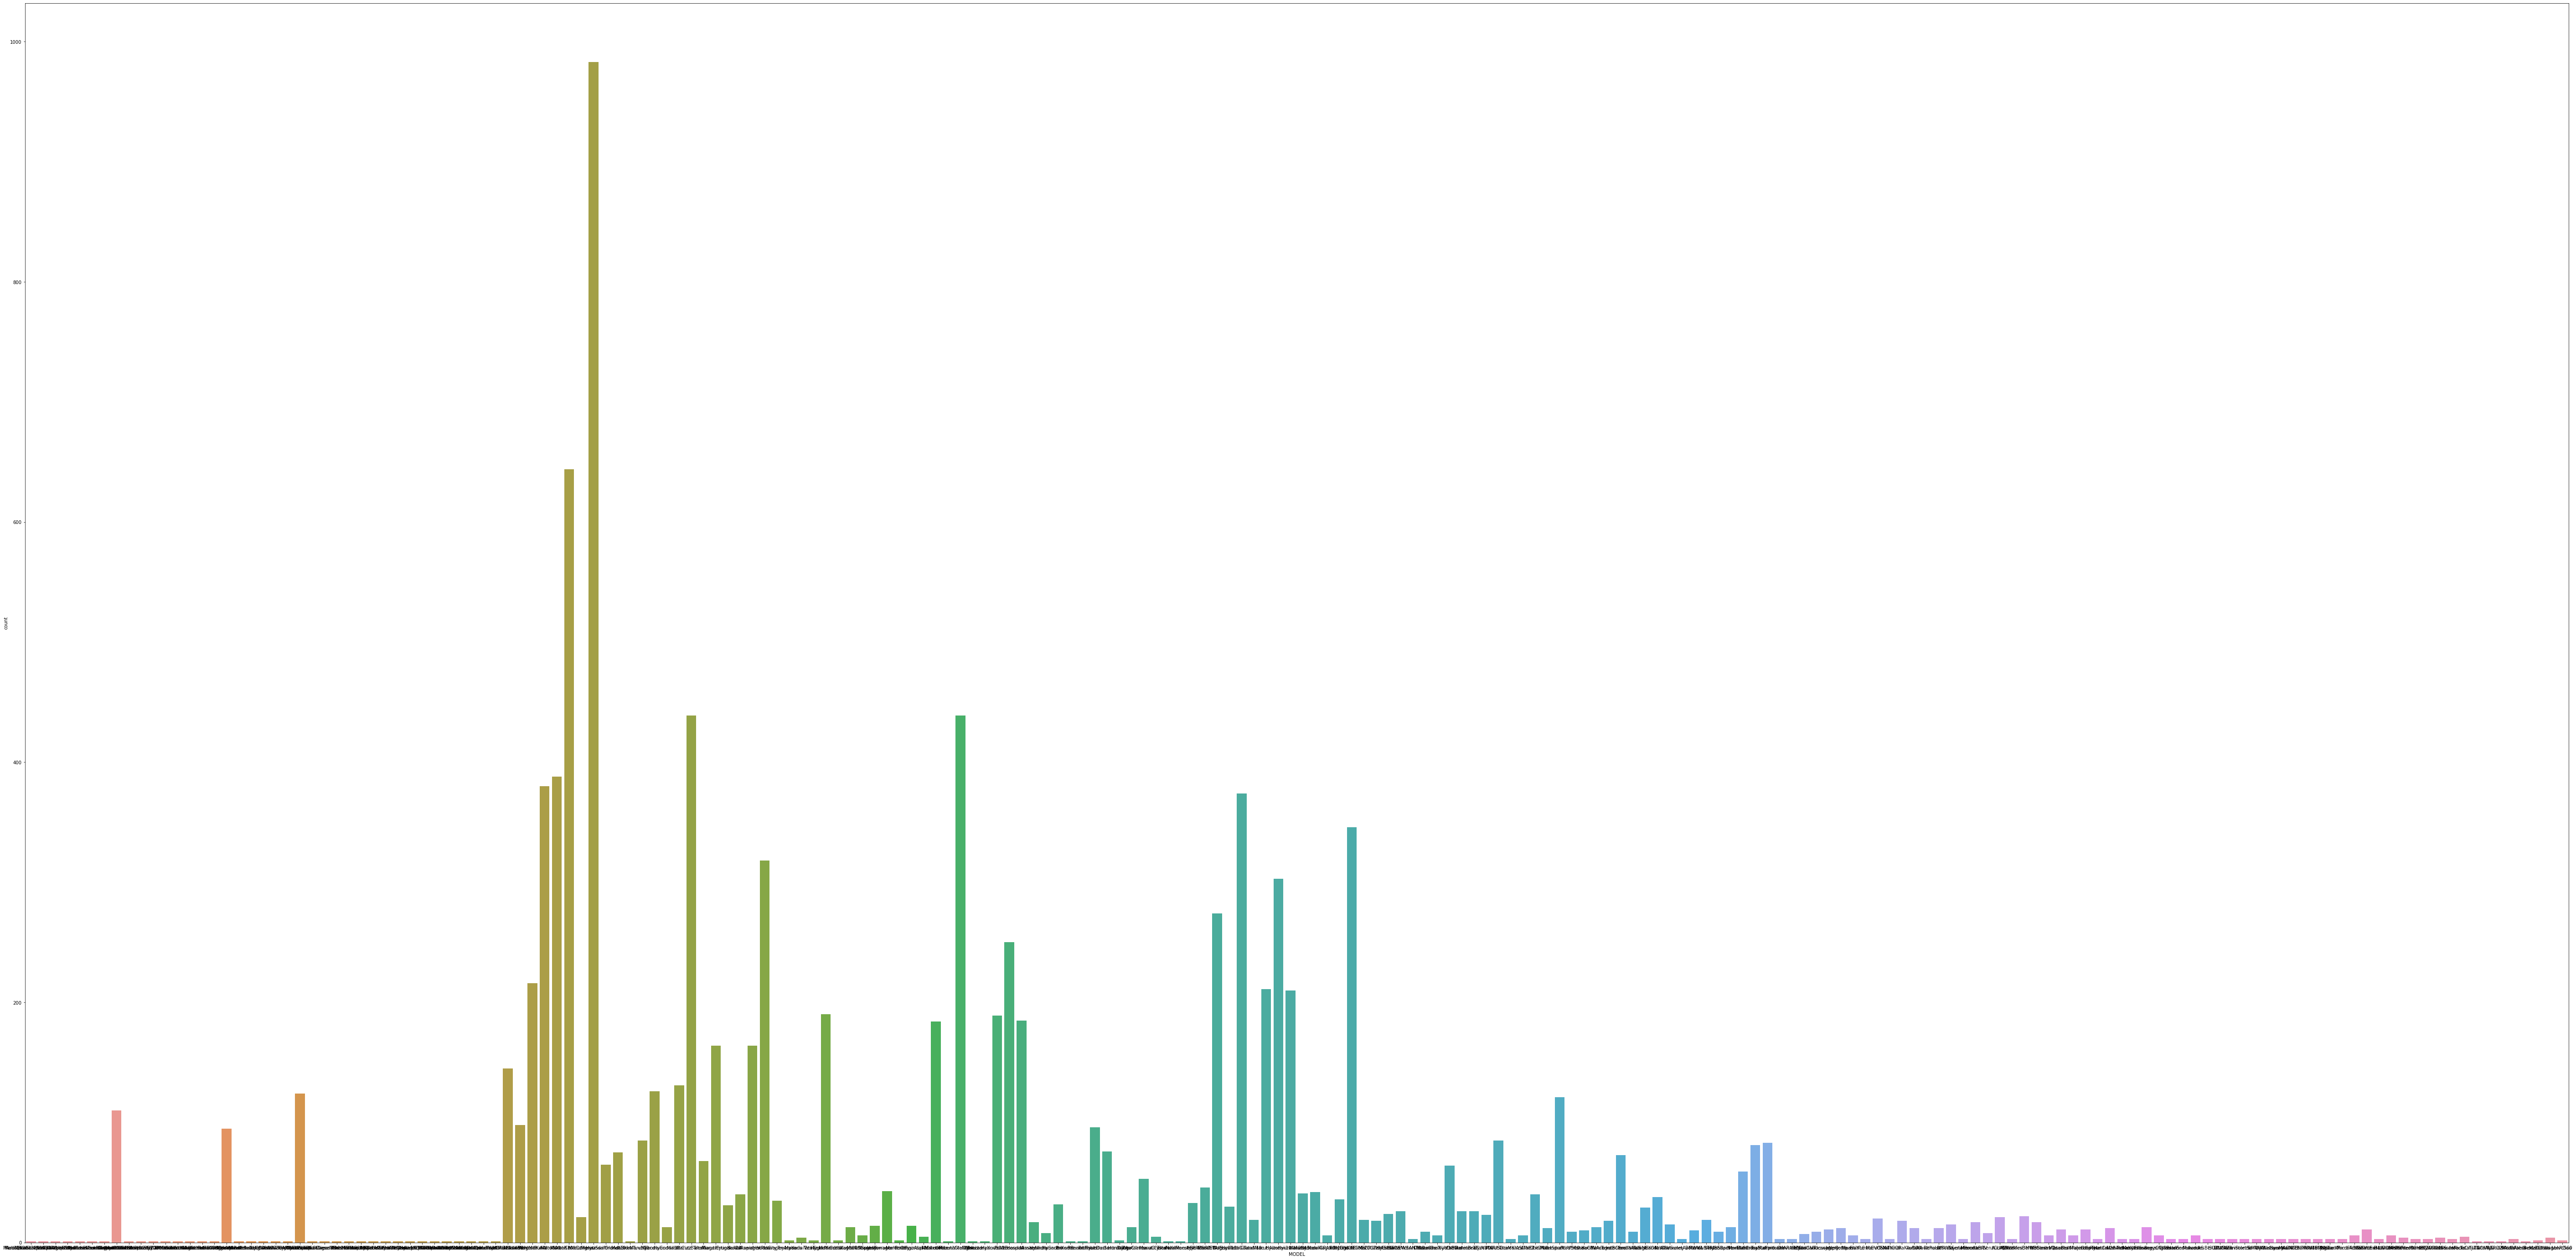

In [24]:
#plotting the count plot for location column
plt.figure(figsize=(100,50))
sns.countplot(x='MODEL',data=data)

<AxesSubplot:xlabel='LOCATION', ylabel='count'>

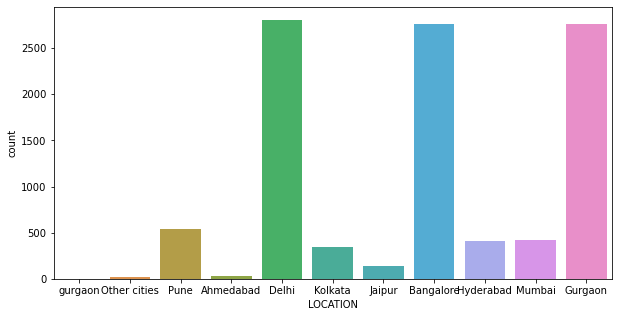

In [25]:
#plotting the count plot for location column
plt.figure(figsize=(10,5))
sns.countplot(x='LOCATION',data=data)

<AxesSubplot:xlabel='WEBSITE', ylabel='count'>

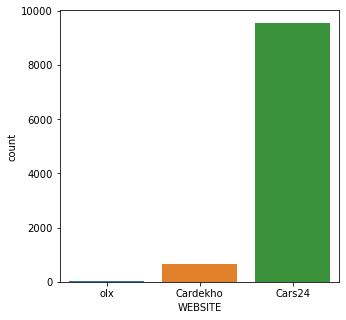

In [26]:
#plotting the count plot for website column
plt.figure(figsize=(5,5))
sns.countplot(x='WEBSITE',data=data)

<AxesSubplot:xlabel='FUEL TYPE', ylabel='count'>

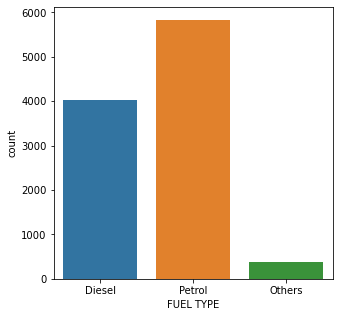

In [27]:
#plotting the count plot for location column
plt.figure(figsize=(5,5))
sns.countplot(x='FUEL TYPE',data=data)

<Figure size 7200x3600 with 0 Axes>

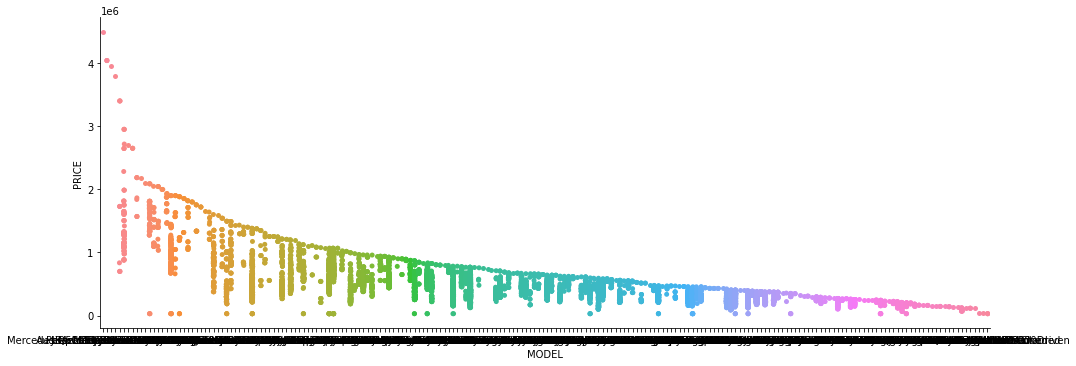

In [28]:
#Lets plot count plot on categorical column and check the data
plt.figure(figsize=(100,50))
sns.catplot(y='PRICE',x='MODEL',data=data.sort_values('PRICE',ascending=False),height=5,aspect=3)
plt.show()

<Figure size 720x360 with 0 Axes>

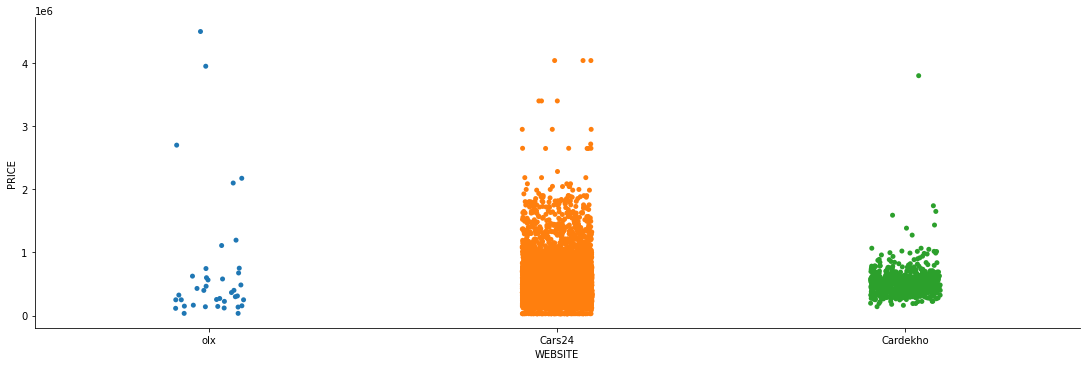

In [29]:
#Lets plot count plot on categorical column and check the data
plt.figure(figsize=(10,5))
sns.catplot(y='PRICE',x='WEBSITE',data=data.sort_values('PRICE',ascending=False),height=5,aspect=3)
plt.show()

<Figure size 360x360 with 0 Axes>

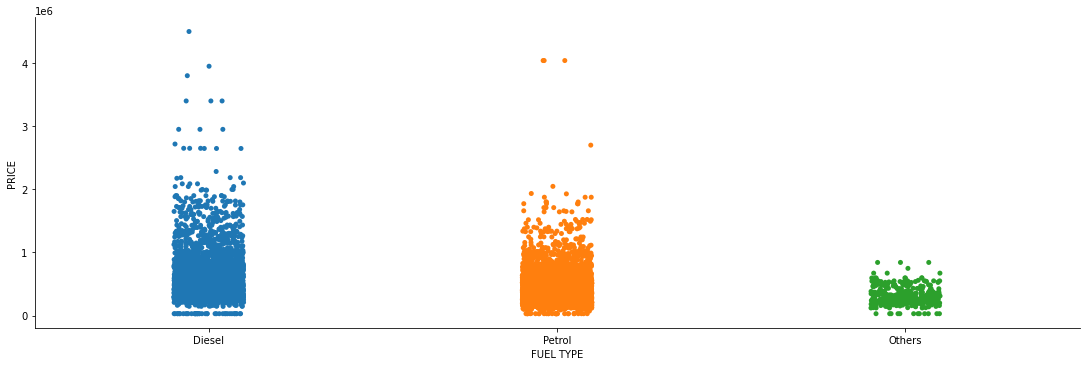

In [30]:
#Lets plot count plot on categorical column and check the data
plt.figure(figsize=(5,5))
sns.catplot(y='PRICE',x='FUEL TYPE',data=data.sort_values('PRICE',ascending=False),height=5,aspect=3)
plt.show()

<Figure size 7200x3600 with 0 Axes>

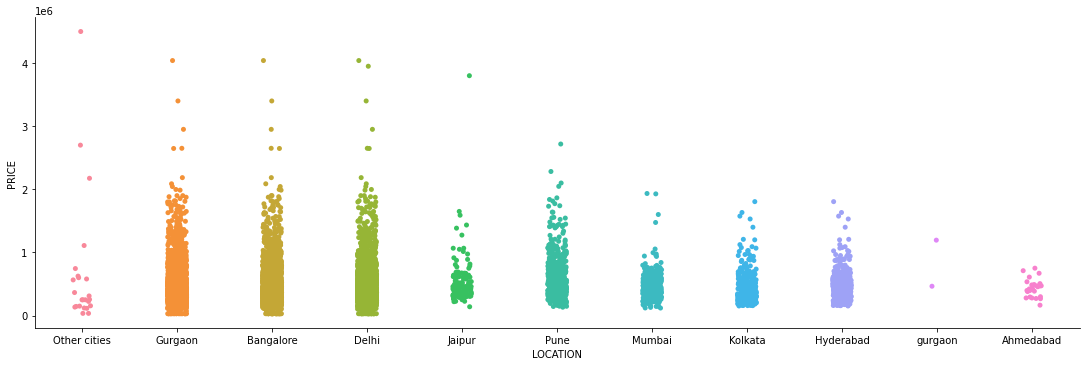

In [31]:
#Lets plot count plot on categorical column and check the data
plt.figure(figsize=(100,50))
sns.catplot(y='PRICE',x='LOCATION',data=data.sort_values('PRICE',ascending=False),height=5,aspect=3)
plt.show()

### Distribution plots for numerical columns

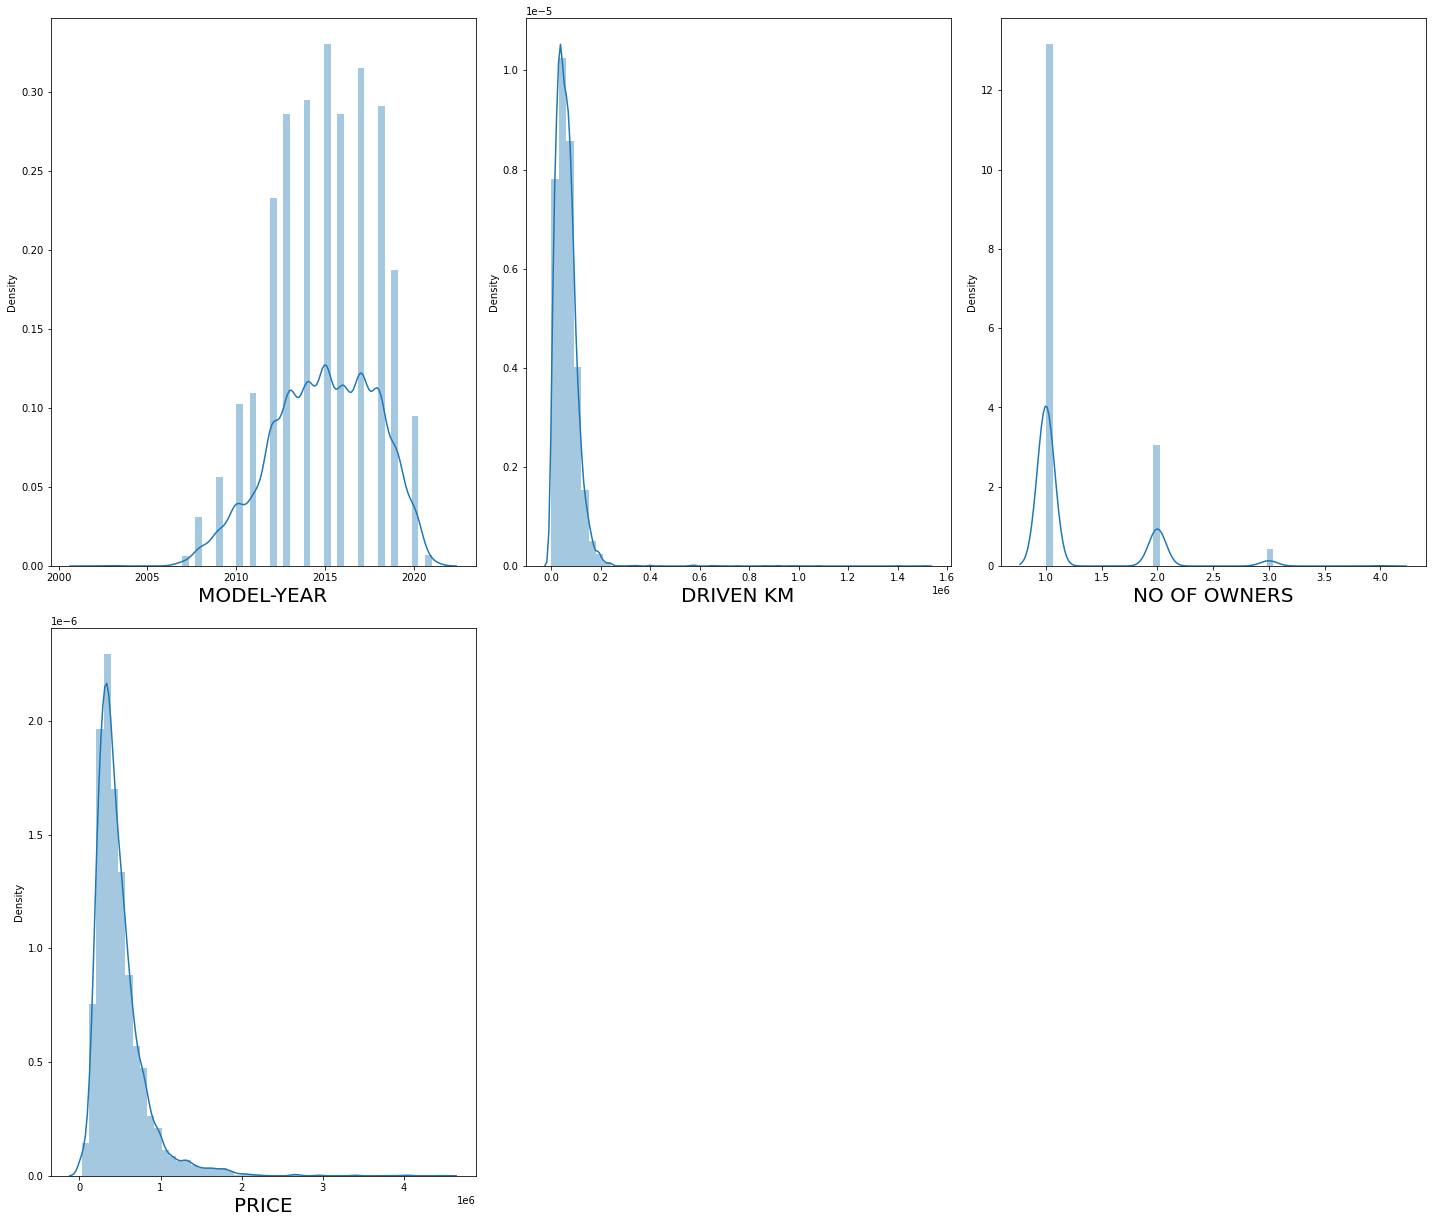

In [32]:
#Now lets plot dist plot and visualise how the data is distributed in each column
#lets plot the distribution plot to check the distribution of our data
plt.figure(figsize=(20,25),facecolor='white')
plotnumber=1
for column in data[num_col]:
    if plotnumber<=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()


### Box plot

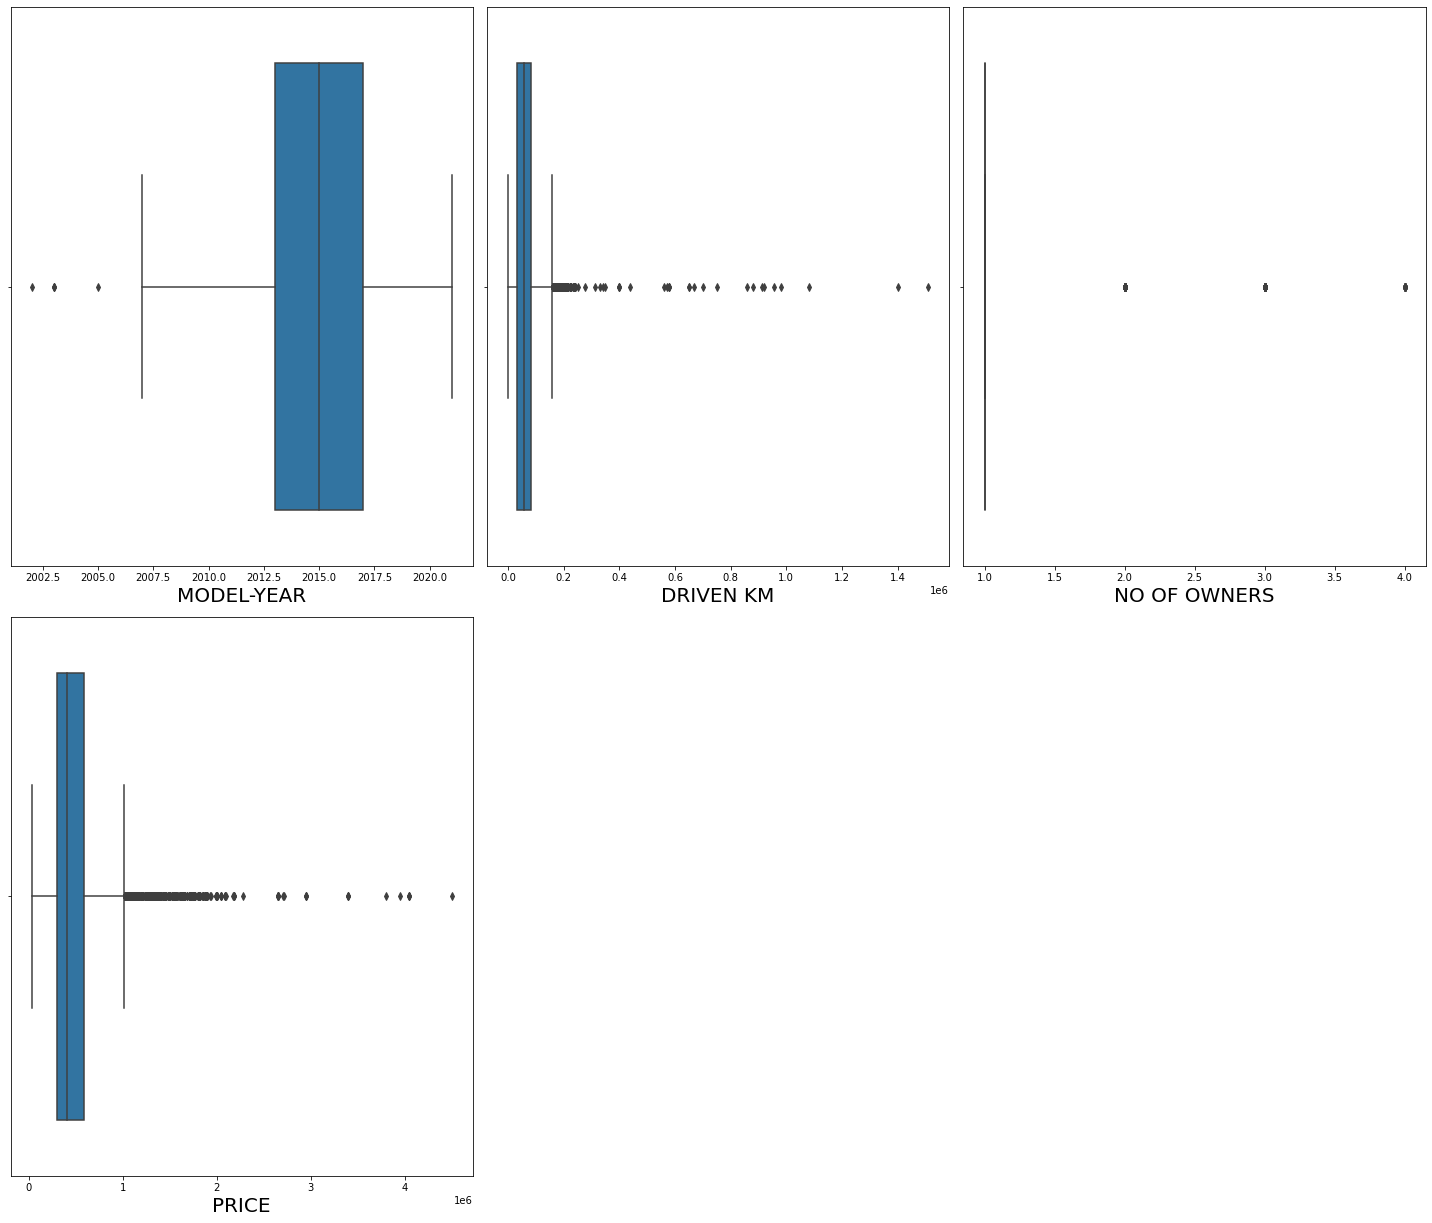

In [33]:
#Plotting the box plot to check the outliers
plt.figure(figsize=(20,25),facecolor='white')
plotnumber=1
for column in data[num_col]:
    if plotnumber<=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.boxplot(data[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()


### Z-Score

In [34]:
#Applying Z score method to remove outliers
#importing the stats from the scipy library
from scipy import stats
col=['MODEL-YEAR','DRIVEN KM','NO OF OWNERS']
#lets remove outiers using z_score
z=np.abs(stats.zscore(data[col]))#abs=absolute numberprint(z)
print(z)

[[1.05385768e+00 1.73791288e+01 4.85193683e-01]
 [2.42108497e+00 2.53312043e+01 3.56825297e+00]
 [1.13748855e-02 1.92710372e+01 4.85193683e-01]
 ...
 [3.58869150e-01 1.37442135e-01 4.85193683e-01]
 [7.06363415e-01 1.58614844e-01 1.54152964e+00]
 [6.83613644e-01 3.75303693e-01 1.54152964e+00]]


In [35]:
print('Row Numbers:',np.where(z>3)[0])

Row Numbers: [    0     1     1     2     4     8    12    13    14    15    17    18
    18    19    20    21    22    23    23    25    26    27    29    31
    35    36    38    56   534   815   820   877   916   920   929  1016
  1068  1112  1119  1151  1243  1268  1270  1297  1319  1328  1330  1518
  1565  1576  1710  1746  1752  1757  1767  1816  1876  1886  1889  1941
  1956  1981  1997  2088  2096  2158  2197  2203  2217  2255  2289  2298
  2319  2323  2388  2389  2408  2422  2462  2532  2560  2574  2617  2635
  2661  2672  2695  2776  2833  2843  2876  2884  2927  2931  2966  3013
  3044  3048  3052  3058  3081  3103  3114  3152  3179  3181  3212  3226
  3240  3258  3298  3309  3318  3322  3362  3367  3383  3518  3523  3580
  3619  3623  3632  3719  3771  3815  3822  3854  3946  3971  3973  4000
  4022  4031  4033  4221  4268  4279  4413  4449  4455  4460  4470  4519
  4579  4589  4592  4644  4659  4684  4700  4791  4799  4861  4900  4906
  4920  4958  4992  5001  5022  5026  

In [36]:
#dropping some of the data of rows which r having outliers
index=(np.where(z>3)[0])
data=data.drop(data.index[index])
data

,MODEL,MODEL-YEAR,FUEL TYPE,LOCATION,WEBSITE,DRIVEN KM,NO OF OWNERS,PRICE
3,MarutiSuzukiAltoK10PetrolGoodConditionwellmain...,2016,Petrol,Other cities,olx,85000,1,250000
5,MarutiSuzukiWagonR,2012,Petrol,Other cities,olx,90000,1,225000
6,HyundaiVernaDiesel60292Driven,2011,Petrol,Other cities,olx,60292,2,250000
7,ToyotaEtiosLiva,2019,Petrol,Other cities,olx,17000,1,580000
9,HyundaiEONPetrol67000Driven,2018,Petrol,Other cities,olx,67000,2,250000
...,...,...,...,...,...,...,...,...
10229,ToyotaInnovaCrysta,2017,Diesel,Kolkata,Cars24,41347,1,1633199
10230,TataZest,2014,Petrol,Kolkata,Cars24,72212,1,305399
10231,MarutiSwiftDzire,2016,Petrol,Kolkata,Cars24,69673,1,517499
10232,FordEcosport,2017,Diesel,Kolkata,Cars24,70791,2,611333


In [37]:
data.shape

(9904, 8)

In [38]:
#We shall use one hot encoder for nominal data
df=pd.get_dummies(data['LOCATION'],drop_first=True)
df

,Bangalore,Delhi,Gurgaon,Hyderabad,Jaipur,Kolkata,Mumbai,Other cities,Pune
3,0,0,0,0,0,0,0,1,0
5,0,0,0,0,0,0,0,1,0
6,0,0,0,0,0,0,0,1,0
7,0,0,0,0,0,0,0,1,0
9,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...
10229,0,0,0,0,0,1,0,0,0
10230,0,0,0,0,0,1,0,0,0
10231,0,0,0,0,0,1,0,0,0
10232,0,0,0,0,0,1,0,0,0


In [39]:
#Lets use label encoder for odinal data
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
col=['MODEL', 'FUEL TYPE', 'WEBSITE']
for i in col:
    data[i]=le.fit_transform(data[i])
data

,MODEL,MODEL-YEAR,FUEL TYPE,LOCATION,WEBSITE,DRIVEN KM,NO OF OWNERS,PRICE
3,114,2016,2,Other cities,2,85000,1,250000
5,116,2012,2,Other cities,2,90000,1,225000
6,63,2011,2,Other cities,2,60292,2,250000
7,170,2019,2,Other cities,2,17000,1,580000
9,45,2018,2,Other cities,2,67000,2,250000
...,...,...,...,...,...,...,...,...
10229,174,2017,0,Kolkata,1,41347,1,1633199
10230,165,2014,2,Kolkata,1,72212,1,305399
10231,118,2016,2,Kolkata,1,69673,1,517499
10232,21,2017,0,Kolkata,1,70791,2,611333


In [40]:
data=pd.concat([data,df],axis=1)
data

,MODEL,MODEL-YEAR,FUEL TYPE,LOCATION,WEBSITE,DRIVEN KM,NO OF OWNERS,PRICE,Bangalore,Delhi,Gurgaon,Hyderabad,Jaipur,Kolkata,Mumbai,Other cities,Pune
3,114,2016,2,Other cities,2,85000,1,250000,0,0,0,0,0,0,0,1,0
5,116,2012,2,Other cities,2,90000,1,225000,0,0,0,0,0,0,0,1,0
6,63,2011,2,Other cities,2,60292,2,250000,0,0,0,0,0,0,0,1,0
7,170,2019,2,Other cities,2,17000,1,580000,0,0,0,0,0,0,0,1,0
9,45,2018,2,Other cities,2,67000,2,250000,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10229,174,2017,0,Kolkata,1,41347,1,1633199,0,0,0,0,0,1,0,0,0
10230,165,2014,2,Kolkata,1,72212,1,305399,0,0,0,0,0,1,0,0,0
10231,118,2016,2,Kolkata,1,69673,1,517499,0,0,0,0,0,1,0,0,0
10232,21,2017,0,Kolkata,1,70791,2,611333,0,0,0,0,0,1,0,0,0


In [41]:
data.drop(columns=['LOCATION'],axis=1,inplace=True)

In [42]:
data.head()

,MODEL,MODEL-YEAR,FUEL TYPE,WEBSITE,DRIVEN KM,NO OF OWNERS,PRICE,Bangalore,Delhi,Gurgaon,Hyderabad,Jaipur,Kolkata,Mumbai,Other cities,Pune
3,114,2016,2,2,85000,1,250000,0,0,0,0,0,0,0,1,0
5,116,2012,2,2,90000,1,225000,0,0,0,0,0,0,0,1,0
6,63,2011,2,2,60292,2,250000,0,0,0,0,0,0,0,1,0
7,170,2019,2,2,17000,1,580000,0,0,0,0,0,0,0,1,0
9,45,2018,2,2,67000,2,250000,0,0,0,0,0,0,0,1,0


<AxesSubplot:>

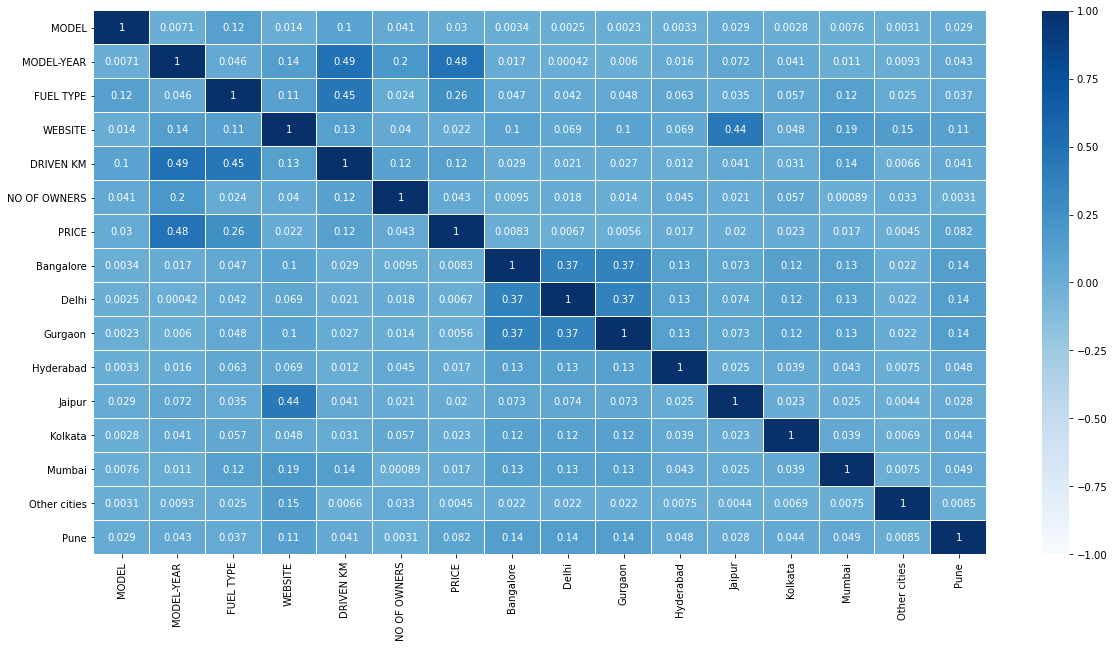

In [43]:
data_corr=data.corr().abs()
plt.figure(figsize=(20,10))
sns.heatmap(data_corr,cmap='Blues',vmin=-1,vmax=1,annot=True,fmt='.2g',linewidth=0.1,center=0)

1.The Dark blue indicates high correlation and light blue indicates less correlation.
2.Our label is highly correlated with model-year, and very less correlated with other cities
3.Even some of the features are correlated with the other features like driven km is corrleated with model year, website is correlated with jaipur, etc. 

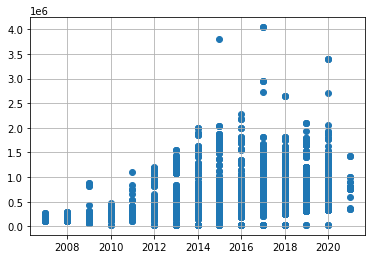

In [44]:
var='MODEL-YEAR'
plt.scatter(x=data[var], y=data['PRICE'])
plt.grid(True)

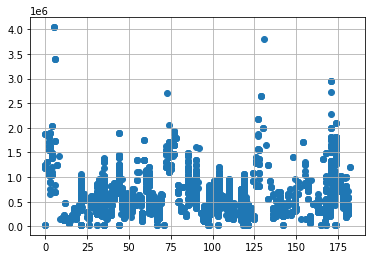

In [45]:
var='MODEL'
plt.scatter(x=data[var], y=data['PRICE'])
plt.grid(True)

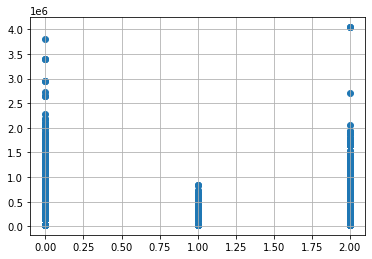

In [46]:
var='FUEL TYPE'
plt.scatter(x=data[var], y=data['PRICE'])
plt.grid(True)

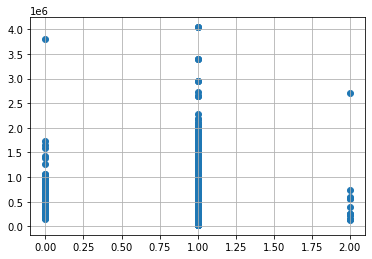

In [47]:
var='WEBSITE'
plt.scatter(x=data[var], y=data['PRICE'])
plt.grid(True)

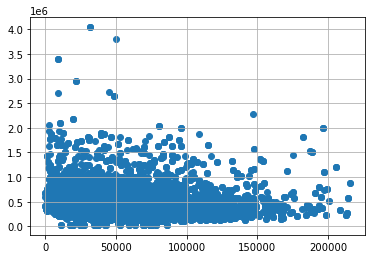

In [48]:
var='DRIVEN KM'
plt.scatter(x=data[var], y=data['PRICE'])
plt.grid(True)

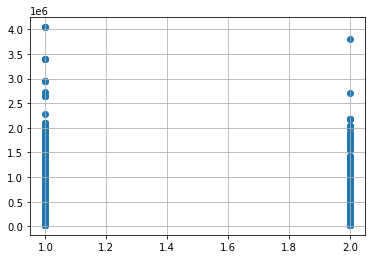

In [49]:
var='NO OF OWNERS'
plt.scatter(x=data[var], y=data['PRICE'])
plt.grid(True)

In [50]:
#checking for skewness in the data
data.skew()

MODEL           -0.024623
MODEL-YEAR      -0.296375
FUEL TYPE       -0.357215
WEBSITE         -3.266280
DRIVEN KM        0.858751
NO OF OWNERS     1.601524
PRICE            2.775161
Bangalore        1.036334
Delhi            1.012844
Gurgaon          1.038644
Hyderabad        4.643696
Jaipur           8.202192
Kolkata          5.082766
Mumbai           4.611364
Other cities    27.551359
Pune             4.040813
dtype: float64

In [51]:
data.head()

,MODEL,MODEL-YEAR,FUEL TYPE,WEBSITE,DRIVEN KM,NO OF OWNERS,PRICE,Bangalore,Delhi,Gurgaon,Hyderabad,Jaipur,Kolkata,Mumbai,Other cities,Pune
3,114,2016,2,2,85000,1,250000,0,0,0,0,0,0,0,1,0
5,116,2012,2,2,90000,1,225000,0,0,0,0,0,0,0,1,0
6,63,2011,2,2,60292,2,250000,0,0,0,0,0,0,0,1,0
7,170,2019,2,2,17000,1,580000,0,0,0,0,0,0,0,1,0
9,45,2018,2,2,67000,2,250000,0,0,0,0,0,0,0,1,0


In [52]:
#seperating label and features in x and y variables
x=data.drop(columns=['PRICE'],axis=1)
y=data['PRICE']

### Scailing

In [53]:
#scailing some of the columns because of the continous data in the columns
from sklearn.preprocessing import StandardScaler
cols=['MODEL-YEAR','DRIVEN KM']
for col in cols:     
    scaler = StandardScaler()     
    x[col] = scaler.fit_transform(x[col].values.reshape(-1, 1))
x

,MODEL,MODEL-YEAR,FUEL TYPE,WEBSITE,DRIVEN KM,NO OF OWNERS,Bangalore,Delhi,Gurgaon,Hyderabad,Jaipur,Kolkata,Mumbai,Other cities,Pune
3,114,0.336316,2,2,0.663825,1,0,0,0,0,0,0,0,1,0
5,116,-1.067783,2,2,0.796179,1,0,0,0,0,0,0,0,1,0
6,63,-1.418808,2,2,0.009782,2,0,0,0,0,0,0,0,1,0
7,170,1.389390,2,2,-1.136197,1,0,0,0,0,0,0,0,1,0
9,45,1.038366,2,2,0.187348,2,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10229,174,0.687341,0,1,-0.491710,1,0,0,0,0,0,1,0,0,0
10230,165,-0.365734,2,1,0.325315,1,0,0,0,0,0,1,0,0,0
10231,118,0.336316,2,1,0.258105,1,0,0,0,0,0,1,0,0,0
10232,21,0.687341,0,1,0.287700,2,0,0,0,0,0,1,0,0,0


### Train Test Split

In [54]:
#Train test split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=45)

### Regression Models

In [55]:
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn import metrics

### Linear Regression

In [56]:
lr=LinearRegression()
lr.fit(x_train,y_train)
y_pred_lr=lr.predict(x_test)
print('Training_score',lr.score(x_train,y_train))
print('Testing_score',lr.score(x_test,y_test))
scr=cross_val_score(lr,x,y,cv=5)
print('Cross validation score: ',scr.mean()*100)
print('Mean squared error',mean_squared_error(y_test,y_pred_lr))
print('Mean Absolute error',mean_absolute_error(y_test,y_pred_lr))
print('RMSE',np.sqrt(mean_squared_error(y_test,y_pred_lr)))


Training_score 0.3127228240861184
Testing_score 0.3523389917247878
Cross validation score:  31.008591055187797
Mean squared error 54415583326.277725
Mean Absolute error 152541.94095454022
RMSE 233271.4798818701


### KNeighbors Regression

In [57]:
knn=KNeighborsRegressor()
knn.fit(x_train,y_train)
y_pred_knn=knn.predict(x_test)
print('Training_score',knn.score(x_train,y_train))
print('Testing_score',knn.score(x_test,y_test))
scr=cross_val_score(knn,x,y,cv=5)
print('Cross validation score: ',scr.mean()*100)
print('Mean squared error',mean_squared_error(y_test,y_pred_knn))
print('Mean Absolute error',mean_absolute_error(y_test,y_pred_lr))
print('RMSE',np.sqrt(mean_squared_error(y_test,y_pred_knn)))


Training_score 0.9019548601909383
Testing_score 0.8476645379828843
Cross validation score:  83.36414443165424
Mean squared error 12799015103.618725
Mean Absolute error 152541.94095454022
RMSE 113132.73223792805


### Decision Tree Regression

In [58]:
dt=DecisionTreeRegressor()
dt.fit(x_train,y_train)
y_pred_dt=dt.predict(x_test)
print('Training_score',dt.score(x_train,y_train))
print('Testing_score',dt.score(x_test,y_test))
scr=cross_val_score(dt,x,y,cv=5)
print('Cross validation score: ',scr.mean()*100)
print('Mean squared error',mean_squared_error(y_test,y_pred_dt))
print('Mean Absolute error',mean_absolute_error(y_test,y_pred_dt))
print('RMSE',np.sqrt(mean_squared_error(y_test,y_pred_dt)))


Training_score 1.0
Testing_score 0.9103446847409753
Cross validation score:  91.39541313551484
Mean squared error 7532715750.657108
Mean Absolute error 25453.745961227785
RMSE 86791.21931772308


### Random Forest Regression

In [64]:
rf=RandomForestRegressor()
rf.fit(x_train,y_train)
y_pred_rf=rf.predict(x_test)
print('Training_score',rf.score(x_train,y_train))
print('Testing_score',rf.score(x_test,y_test))
scr=cross_val_score(rf,x,y,cv=5)
print('Cross validation score: ',scr.mean()*100)
print('Mean squared error',mean_squared_error(y_test,y_pred_rf))
print('Mean Absolute error',mean_absolute_error(y_test,y_pred_rf))
print('RMSE',np.sqrt(mean_squared_error(y_test,y_pred_rf)))

Training_score 0.9896156032801258
Testing_score 0.9277744635202276
Cross validation score:  93.16027280585267
Mean squared error 6068289812.701054
Mean Absolute error 37018.97155088853
RMSE 77899.22857577637


### Support Vector Regression

In [60]:
svm=SVR()
svm.fit(x_train,y_train)
y_pred_svm=svm.predict(x_test)
print('Training_score',svm.score(x_train,y_train))
print('Testing_score',svm.score(x_test,y_test))
scr=cross_val_score(svm,x,y,cv=5)
print('Cross validation score: ',scr.mean()*100)
print('Mean squared error',mean_squared_error(y_test,y_pred_svm))
print('Mean Absolute error',mean_absolute_error(y_test,y_pred_svm))
print('RMSE',np.sqrt(mean_squared_error(y_test,y_pred_svm)))


Training_score -0.06065703670137612
Testing_score -0.06459371329978203
Cross validation score:  -6.44032867297096
Mean squared error 89445693309.48383
Mean Absolute error 198071.9220557226
RMSE 299074.7286373154


### Ada Boost Regression

In [61]:
from sklearn.ensemble import AdaBoostRegressor
ab=AdaBoostRegressor()
ab.fit(x_train,y_train)
y_pred_ab=ab.predict(x_test)
print('Training_score',ab.score(x_train,y_train))
print('Testing_score',ab.score(x_test,y_test))
scr=cross_val_score(ab,x,y,cv=5)
print('Cross validation score: ',scr.mean()*100)
print('Mean squared error',mean_squared_error(y_test,y_pred_ab))
print('Mean Absolute error',mean_absolute_error(y_test,y_pred_ab))
print('RMSE',np.sqrt(mean_squared_error(y_test,y_pred_ab)))


Training_score 0.03686403086210743
Testing_score -0.12801842574437972
Cross validation score:  10.029488454858084
Mean squared error 94774550042.98607
Mean Absolute error 268302.02143735485
RMSE 307854.7547837877


### Lasso Regression

In [62]:
lar=Lasso()
lar.fit(x_train,y_train)
y_pred_lar=lar.predict(x_test)
print('Training_score',lar.score(x_train,y_train))
print('Testing_score',lar.score(x_test,y_test))
scr=cross_val_score(lar,x,y,cv=5)
print('Cross validation score: ',scr.mean()*100)
print('Mean squared error',mean_squared_error(y_test,y_pred_lar))
print('Mean Absolute error',mean_absolute_error(y_test,y_pred_lar))
print('RMSE',np.sqrt(mean_squared_error(y_test,y_pred_lar)))


Training_score 0.31272237791038693
Testing_score 0.352383149357712
Cross validation score:  31.025444401030654
Mean squared error 54411873262.95266
Mean Absolute error 152533.80251063293
RMSE 233263.52750259236


### Hyper parameter Tuning

### Best Fit Model

### Random Forest Regressor

In [63]:
param_grid= {"max_depth":[1,3,5,7,9,11,12],"n_estimators": [10,20,30],"max_features": ["auto", "sqrt", "log2"],"min_samples_split": [2,4,8],"bootstrap":[True, False],"criterion":['mse','friedman_mse']}

In [74]:
GCV = GridSearchCV(rf,param_grid,cv=5,n_jobs=-1)

In [75]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'criterion': ['mse', 'friedman_mse'],
                         'max_depth': [1, 3, 5, 7, 9, 11, 12],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_split': [2, 4, 8],
                         'n_estimators': [10, 20, 30]})

In [76]:
GCV.best_params_

{'bootstrap': True,
 'criterion': 'mse',
 'max_depth': 12,
 'max_features': 'auto',
 'min_samples_split': 2,
 'n_estimators': 30}

In [65]:
final_model= RandomForestRegressor(bootstrap=True,criterion='mse',max_depth=30,max_features='auto',min_samples_split=4,n_estimators=30)
final_model.fit(x_train,y_train)
pred_rf= final_model.predict(x_test)
print('Training Score:',rf.score(x_train,y_train))
print('Testing score:',rf.score(x_test,y_test)*100)
print('Cross validation score:',np.mean(cross_val_score(rf,x,y,cv=5)))
print('MAE:',mean_absolute_error(y_test,pred_rf))
print('MSE:',mean_squared_error(y_test,pred_rf))
print('RMSE:',np.sqrt(mean_squared_error(y_test,pred_rf)))

Training Score: 0.9896156032801258
Testing score: 92.77744635202276
Cross validation score: 0.9310566295586249
MAE: 39425.833814242025
MSE: 6777188236.971624
RMSE: 82323.67968556572


In [66]:
Model=[]
Model.append(('Linear Regression',lr))
Model.append(('KNeighbors Regressor',knn))
Model.append(('DecisionTreeClassifier',dt))
Model.append(('RandomForest Regressor',rf))
Model.append(('Ada Boost Regressor',ab))
Model.append(('SVR',svm))
Model.append(('Lasso Regressor',lar))

In [67]:
Models=[]
Score=[]
MSE=[]
RMSE=[]
MAE=[]

for name,model in Model:
    print(name, '\n')
    Models.append(name)
    
    model.fit(x_train,y_train)
    print(model)
    pred=model.predict(x_test)
    print('\n')
    
# Model Score
    a=model.score(x_test,y_test)
    print('Model Score: ',a)
    Score.append(a*100)
    print('\n')
    
# MSE
    m=mean_squared_error(y_test,pred)
    print('MSE Score: ',m)
    MSE.append(m)
    print('\n') 
    
#MAE

    m=mean_absolute_error(y_test,pred)
    print('MAE: ',m)
    MAE.append(m)
    print('\n') 
    
# RMSE
    r=np.sqrt(mean_squared_error(y_test,pred))
    print('RMSE Score: ',r)
    RMSE.append(r)
    print('\n')


Linear Regression 

LinearRegression()


Model Score:  0.3523389917247878


MSE Score:  54415583326.277725


MAE:  152541.94095454022


RMSE Score:  233271.4798818701


KNeighbors Regressor 

KNeighborsRegressor()


Model Score:  0.8476645379828843


MSE Score:  12799015103.618725


MAE:  62581.269547657525


RMSE Score:  113132.73223792805


DecisionTreeClassifier 

DecisionTreeRegressor()


Model Score:  0.9234447823317278


MSE Score:  6432063645.738288


MAE:  24291.128432956382


RMSE Score:  80200.14741718551


RandomForest Regressor 

RandomForestRegressor()


Model Score:  0.9257238303357976


MSE Score:  6240581180.396859


MAE:  37035.51170436187


RMSE Score:  78997.34919854501


Ada Boost Regressor 

AdaBoostRegressor()


Model Score:  -0.01114854142052768


MSE Score:  84955303789.92982


MAE:  242543.44529466366


RMSE Score:  291470.9312949232


SVR 

SVR()


Model Score:  -0.06459371329978203


MSE Score:  89445693309.48383


MAE:  198071.9220557226


RMSE Score:  29907

In [68]:
#Making DataFrame
pd.DataFrame({"Models":Models,"Model Score":Score,'Mean Squared Error':MSE,'Mean Absolute Error':MAE,'Root Mean Squared error':RMSE})

,Models,Model Score,Mean Squared Error,Mean Absolute Error,Root Mean Squared error
0,Linear Regression,35.233899,5.441558e+10,152541.940955,233271.479882
1,KNeighbors Regressor,84.766454,1.279902e+10,62581.269548,113132.732238
2,DecisionTreeClassifier,92.344478,6.432064e+09,24291.128433,80200.147417
3,RandomForest Regressor,92.572383,6.240581e+09,37035.511704,78997.349199
4,Ada Boost Regressor,-1.114854,8.495530e+10,242543.445295,291470.931295
5,SVR,-6.459371,8.944569e+10,198071.922056,299074.728637
6,Lasso Regressor,35.238315,5.441187e+10,152533.802511,233263.527503


In [69]:
print(y_pred_lr[:15])
print(y_test.values[:15])

[689816.32267886 435355.49153886 243647.43977354 435486.4043273
 584870.60899075 530252.6050899  453165.50064883 597484.2556622
 555824.35827583 680029.54419592 484875.1710615  759633.79973136
 525654.20043273 627617.4205569  601150.06602923]
[799000 273000 250899 381500 815000 228199 234299 705500 312322 687399
 337899 550099 249399 901000 490000]


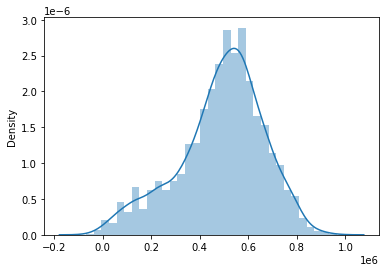

In [70]:
#Scatter plot for test data prediction
sns.distplot(y_pred_lr)
plt.show()

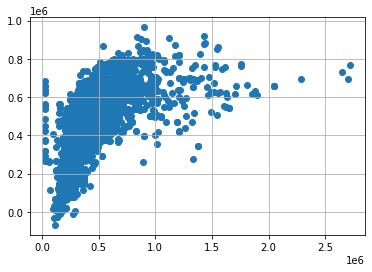

In [71]:
#Scatter plot
plt.scatter(x=y_test, y=y_pred_lr)
plt.grid(True)

### Saving the model

In [72]:
import joblib
joblib.dump(rf,"Used Cars Price prediction")

['Used Cars Price prediction']